In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [6]:
mp_holistic = mp.solutions.holistic    # holistic model
mp_drawing = mp.solutions.drawing_utils    # drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    # color conversion(process image)
    image.flags.writeable = False    # image is no longer writeable
    results = model.process(image)    # make predictions
    image.flags.writeable = True    # image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)    # color conversion back(unprocess image)
    return image, results

In [28]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)    # draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)    # draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    # draw right hand connections

In [35]:
def draw_styled_landmarks(image, results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(88, 22, 10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))    
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)) 
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))  

In [21]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [38]:
cap = cv2.VideoCapture(0)    # access our webcam
# set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():    # read videofeed from webcam, loop through all frames in camera
        # read feed
        ret, frame = cap.read()    # grab current frame from our camera at a point in time
        # make predictions
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # draw landmarks
        # draw_landmarks(image, results)
        draw_styled_landmarks(image, results)
        # show to screen
        cv2.imshow("OpenCV Feed", image)
        # breaking gracefully
        if cv2.waitKey(10) & 0xFF==ord('q'):    # wait for key to be pressed inside our frame and if key==q then break out
            break
    cap.release()    # release our webcam
    cv2.destroyAllWindows()    # close our frame

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [22]:
print(len(results.face_landmarks.landmark))
print(len(results.pose_landmarks.landmark))

468
33


In [40]:
draw_landmarks(frame, results)

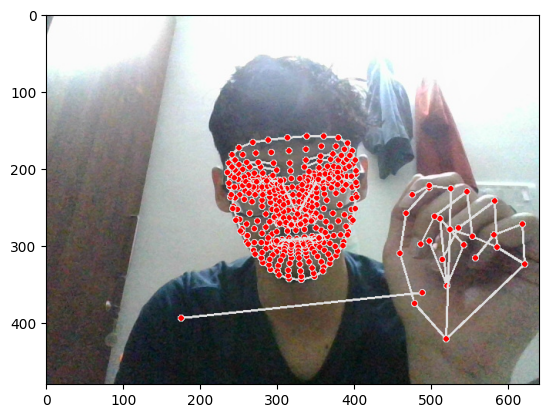

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [45]:
results.pose_landmarks.landmark[0].visibility

0.9998128414154053

In [47]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [62]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [63]:
face

array([ 0.50905448,  0.60759485, -0.0192537 , ...,  0.59144199,
        0.42879459, -0.00513275])

In [64]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, face, lh, rh])

In [65]:
extract_keypoints(results).shape

(1662,)